<a href="https://colab.research.google.com/github/fboldt/aulasml/blob/master/aula09a_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_iris
data = load_iris()
X = data.data[:,2:4]
y = data.target


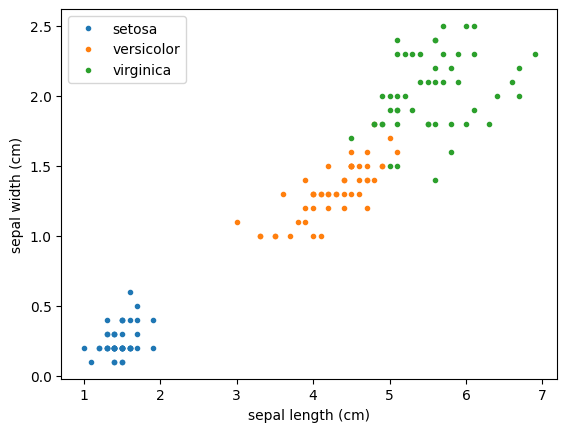

In [37]:
import matplotlib.pyplot as plt

def plot_dataset(X,y):
  for i in range(len(set(y))):
    plt.plot(X[y==i,0],X[y==i,1],'.',label=data.target_names[i])
  plt.xlabel(data.feature_names[0])
  plt.ylabel(data.feature_names[1])
  plt.legend()

plot_dataset(X,y)
plt.show()

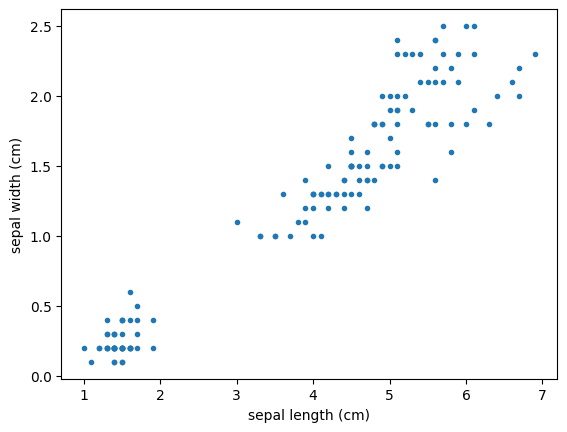

In [3]:
plt.scatter(X[:,0],X[:,1], marker='.')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.show()

[[5.62608696 2.04782609]
 [4.29259259 1.35925926]
 [1.462      0.246     ]]


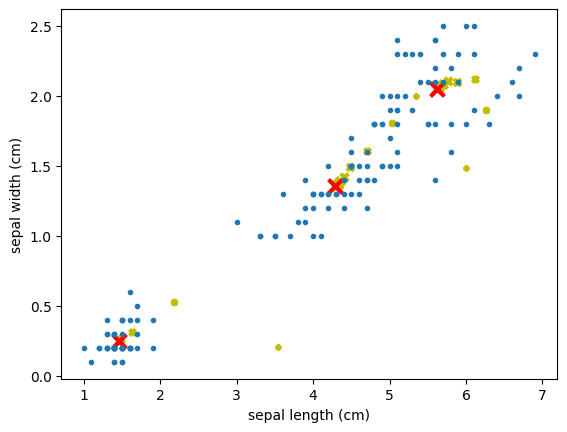

In [34]:
from sklearn.base import BaseEstimator, ClusterMixin, TransformerMixin
import numpy as np
import random

class KMeans(BaseEstimator,ClusterMixin,TransformerMixin):
  def __init__(self,n_clusters=3,max_iter=100):
    self.n_clusters = n_clusters
    self.max_iter = max_iter
    self.centroids_ = []

  def _init_centroids(self,X):
    min = np.min(X,axis=0)
    max = np.max(X,axis=0)
    return np.random.uniform(min,max,(self.n_clusters,X.shape[1]))

  def fit(self,X,y=None):
    self.centroids_ = self._init_centroids(X)
    self.previous_centroids = []
    self.previous_centroids.append(self.centroids_.copy())
    while self.max_iter > 0:
      self.max_iter -= 1
      ypred = self.predict(X)
      for i in range(self.n_clusters):
        self.centroids_[i] = np.mean(X[ypred==i],axis=0)
      if np.allclose(self.previous_centroids[-1],self.centroids_):
        break
      self.previous_centroids.append(self.centroids_.copy())
    self.centroids_ = np.array(self.centroids_)
    return self

  def distances(self,x):
    diferences = self.centroids_ - x
    squared = diferences**2
    summed = np.sum(squared,axis=1)
    root = np.sqrt(summed)
    return root

  def predict(self,X):
    ypred = np.empty((X.shape[0],))
    for i in range(X.shape[0]):
      distances = self.distances(X[i])
      centroid = np.argmin(distances)
      ypred[i] = centroid
    return ypred

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
print(kmeans.centroids_)

for i in range(len(kmeans.previous_centroids)):
  prvcnt = np.array(kmeans.previous_centroids[i])
  plt.scatter(prvcnt[:,0], prvcnt[:,1],
            marker='x', color='y', s=5*(i+2), linewidths=3)
plt.scatter(kmeans.centroids_[:,0], kmeans.centroids_[:,1],
            marker='x', color='r', s=100, linewidths=3)
plt.scatter(X[:,0],X[:,1], marker='.')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.show()

In [35]:
def define_axes(X):
    offset = 0.1
    min1, max1 = X[:, 0].min(), X[:, 0].max()
    min2, max2 = X[:, 1].min(), X[:, 1].max()
    return [min1-offset, max1+offset, min2-offset, max2+offset]

def plot_predictions(clf, X):
    axes = define_axes(X)
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)

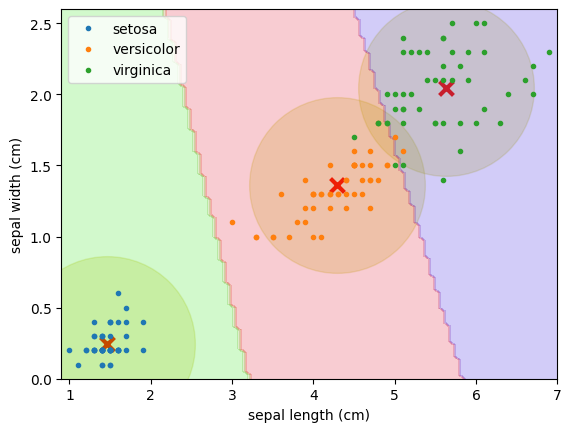

In [46]:
plot_dataset(X, y)
plt.scatter(kmeans.centroids_[:,0], kmeans.centroids_[:,1],
            marker='x', color='r', s=100, linewidths=3)
plt.scatter(kmeans.centroids_[:,0], kmeans.centroids_[:,1],
            marker='o', color='y', s=16000, linewidths=1, alpha=0.2)
plot_predictions(kmeans, X)
plt.show()